In [69]:
# Veri işleme ve analiz için
import pandas as pd
import numpy as np

# Veri görselleştirme için
import seaborn as sns
import matplotlib.pyplot as plt

# Veriyi eğitim ve test setlerine ayırma
from sklearn.model_selection import train_test_split

# Modelleme için
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Model değerlendirme için
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Kategorik veriyi sayısala dönüştürme (Encoding için)
from sklearn.preprocessing import LabelEncoder

# Verinin eksik değerleri için
from sklearn.impute import SimpleImputer


In [70]:
train_df=pd.read_csv(r'C:\Users\gokal\Desktop\Udemy\FINAL_TF2_FILES\TF_2_Notebooks_and_Data\GKLP\Kisisel Proje\titanic Project\train.csv')

In [71]:
test_df=pd.read_csv(r'C:\Users\gokal\Desktop\Udemy\FINAL_TF2_FILES\TF_2_Notebooks_and_Data\GKLP\Kisisel Proje\titanic Project\test.csv')

In [72]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [73]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

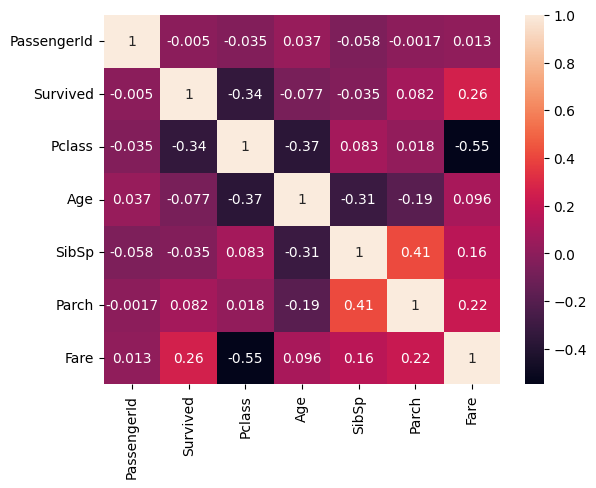

In [74]:
numeric_train_df=train_df.select_dtypes(include='number')
sns.heatmap(numeric_train_df.corr(),annot=True)

In [75]:
numeric_train_df.corr()['Survived'].sort_values

<bound method Series.sort_values of PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64>

In [76]:
from sklearn.preprocessing import LabelEncoder

In [77]:
labelEncoder=LabelEncoder()

In [78]:
train_df['Sex_encoded']=labelEncoder.fit_transform(train_df['Sex'])

In [79]:
train_df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0


In [80]:
train_df.drop('Sex',axis=1)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encoded
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,C,1


<Axes: >

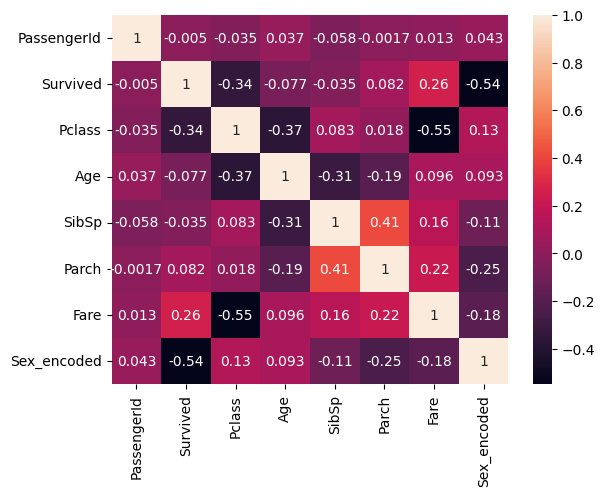

In [81]:
numeric_train_df=train_df.select_dtypes(include='number')
sns.heatmap(numeric_train_df.corr(),annot=True)

In [82]:
numeric_train_df.corr()['Survived'].sort_values()

Sex_encoded   -0.543351
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

In [83]:
train_df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

C:\Users\gokal\AppData\Local\Temp\ipykernel_40860\3155494004.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train_df['Embarked'], palette='pastel')


<Axes: xlabel='Embarked', ylabel='count'>

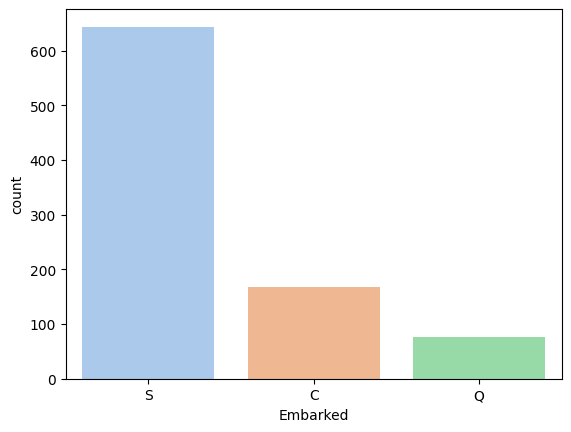

In [84]:
sns.countplot(x=train_df['Embarked'], palette='pastel')

<Axes: xlabel='Embarked', ylabel='count'>

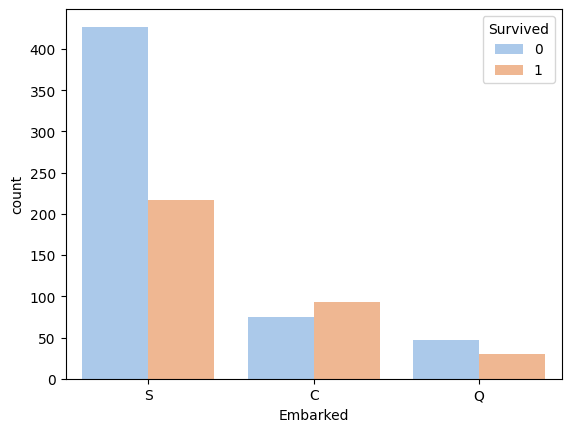

In [85]:
sns.countplot(x=train_df['Embarked'], hue=train_df['Survived'], palette='pastel')

In [86]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [87]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Sex_encoded      0
dtype: int64

In [88]:
train_df['Family_Size']= train_df['SibSp']+train_df['Parch']+1
train_df['Alone']=(train_df['Family_Size']==1).astype(int)

In [89]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encoded,Family_Size,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,1


In [90]:
train_df.drop('SibSp',axis=1,inplace=True)

In [91]:
train_df.drop('Parch',axis=1,inplace=True)

In [92]:
train_df.drop('Sex',axis=1,inplace=True)

In [93]:
train_df.head(20)

,PassengerId,Survived,Pclass,Name,Age,Ticket,Fare,Cabin,Embarked,Sex_encoded,Family_Size,Alone
0,1,0,3,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,NaN,S,1,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,71.2833,C85,C,0,2,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282,7.9250,NaN,S,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,113803,53.1000,C123,S,0,2,0
4,5,0,3,"Allen, Mr. William Henry",35.0,373450,8.0500,NaN,S,1,1,1
5,6,0,3,"Moran, Mr. James",NaN,330877,8.4583,NaN,Q,1,1,1
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,17463,51.8625,E46,S,1,1,1
7,8,0,3,"Palsson, Master. Gosta Leonard",2.0,349909,21.0750,NaN,S,1,5,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,347742,11.1333,NaN,S,0,3,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,237736,30.0708,NaN,C,0,2,0


<Axes: >

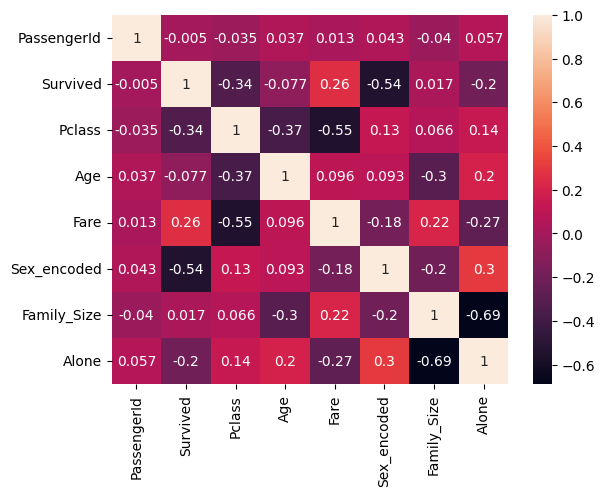

In [94]:
sns.heatmap(train_df.corr(numeric_only=True),annot=True)

In [95]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Age            177
Ticket           0
Fare             0
Cabin          687
Embarked         2
Sex_encoded      0
Family_Size      0
Alone            0
dtype: int64

In [96]:
train_df=train_df.drop('Cabin',axis=1)

In [97]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Age            177
Ticket           0
Fare             0
Embarked         2
Sex_encoded      0
Family_Size      0
Alone            0
dtype: int64

In [98]:
train_df['Age'].fillna(train_df['Age'].mean(),inplace=True)

C:\Users\gokal\AppData\Local\Temp\ipykernel_40860\3027320363.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].mean(),inplace=True)


In [99]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Age            0
Ticket         0
Fare           0
Embarked       2
Sex_encoded    0
Family_Size    0
Alone          0
dtype: int64

In [100]:
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0],inplace=True)

C:\Users\gokal\AppData\Local\Temp\ipykernel_40860\2724695745.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Embarked'].fillna(train_df['Embarked'].mode()[0],inplace=True)


In [101]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Age            0
Ticket         0
Fare           0
Embarked       0
Sex_encoded    0
Family_Size    0
Alone          0
dtype: int64

<Axes: xlabel='Sex_encoded', ylabel='count'>

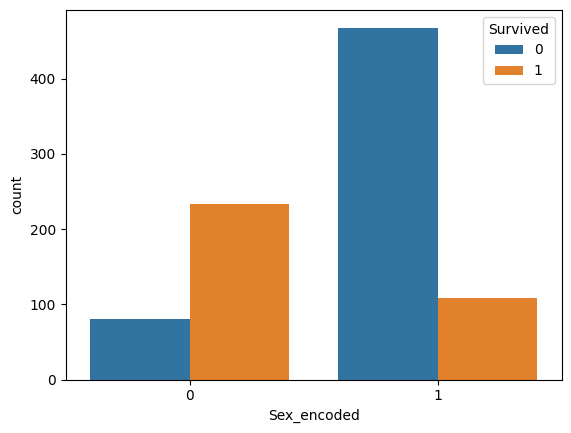

In [102]:
sns.countplot(x=train_df['Sex_encoded'],data=train_df,hue=train_df['Survived'])

In [103]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [104]:
# Test verisinde de eksik değerleri doldurma ve dönüşümleri yapma

# 'Sex' sütununu encode et
test_df['Sex_encoded'] = labelEncoder.transform(test_df['Sex'])  # Train'deki encoder'ı kullan!

# 'Family_Size' ve 'Alone' sütunlarını ekle
test_df['Family_Size'] = test_df['SibSp'] + test_df['Parch'] + 1
test_df['Alone'] = (test_df['Family_Size'] == 1).astype(int)

# Gereksiz sütunları düşür (Train'de düşürdüklerini burada da düşmelisin!)
test_df.drop(['SibSp', 'Parch', 'Sex', 'Cabin'], axis=1, inplace=True)

# Eksik yaş verilerini ortalama ile doldur
test_df['Age'].fillna(train_df['Age'].mean(), inplace=True)

# 'Embarked' sütunundaki boşlukları en sık tekrar eden değerle doldur
test_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

# İşlemleri kontrol et
print(test_df.isnull().sum())  # Eksik değer kalmadığını kontrol et
print(test_df.head())  # İlk birkaç satırı incele


PassengerId    0
Pclass         0
Name           0
Age            0
Ticket         0
Fare           1
Embarked       0
Sex_encoded    0
Family_Size    0
Alone          0
dtype: int64
   PassengerId  Pclass                                          Name   Age  \
0          892       3                              Kelly, Mr. James  34.5   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  47.0   
2          894       2                     Myles, Mr. Thomas Francis  62.0   
3          895       3                              Wirz, Mr. Albert  27.0   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  22.0   

    Ticket     Fare Embarked  Sex_encoded  Family_Size  Alone  
0   330911   7.8292        Q            1            1      1  
1   363272   7.0000        S            0            2      0  
2   240276   9.6875        Q            1            1      1  
3   315154   8.6625        S            1            1      1  
4  3101298  12.2875        S

C:\Users\gokal\AppData\Local\Temp\ipykernel_40860\4276512318.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Age'].fillna(train_df['Age'].mean(), inplace=True)
C:\Users\gokal\AppData\Local\Temp\ipykernel_40860\4276512318.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

In [105]:
test_df['Fare'].fillna(test_df['Fare'].mean(),inplace=True)

C:\Users\gokal\AppData\Local\Temp\ipykernel_40860\498746240.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Fare'].fillna(test_df['Fare'].mean(),inplace=True)


In [106]:
train_df['Embarked']=labelEncoder.fit_transform(train_df['Embarked'])

In [107]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Age            0
Ticket         0
Fare           0
Embarked       0
Sex_encoded    0
Family_Size    0
Alone          0
dtype: int64

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
from sklearn.model_selection import GridSearchCV

In [110]:
X=train_df.drop(columns=['Survived','Name','Ticket','PassengerId'],axis=1)

In [111]:
y=train_df['Survived']

In [112]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.25)

In [134]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [114]:
RFC=RandomForestClassifier(max_depth=10,
                           n_estimators=200,
                           random_state=101,
                           n_jobs=-1)

In [115]:
params={
    'max_depth':[None, 10, 20,30,40],
    'n_estimators':[50, 100, 200,250],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [116]:
grid_search = GridSearchCV(estimator=RFC, param_grid=params, cv=5, n_jobs=-1, verbose=2)

In [117]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=10, n_estimators=200,
                                              n_jobs=-1, random_state=101),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30, 40],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200, 250]},
             verbose=2)

In [121]:
print("En iyi hiperparametreler:", grid_search.best_params_)
print("En iyi skor:", grid_search.best_score_)

En iyi hiperparametreler: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
En iyi skor: 0.8278756592974975


In [122]:
RFC=RandomForestClassifier(min_samples_leaf=2, 
                           n_estimators=50, 
                           n_jobs=-1,
                           random_state=101)

In [124]:
RFC.fit(X_train,y_train)

RandomForestClassifier(min_samples_leaf=2, n_estimators=50, n_jobs=-1,
                       random_state=101)

In [125]:
from sklearn.metrics import classification_report,confusion_matrix

In [126]:
x_pred=RFC.predict(X_test)

In [127]:
cm_RFC=x=confusion_matrix(x_pred,y_test)

In [128]:
cm_RFC

array([[116,  21],
       [ 18,  68]])

<Axes: >

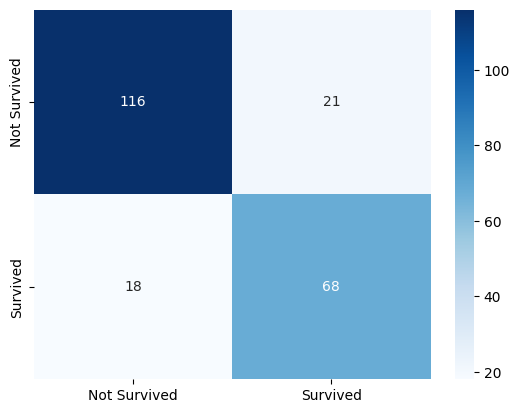

In [129]:
sns.heatmap(cm_RFC, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])

In [130]:
cr_RFC=classification_report(x_pred,y_test)

In [131]:
print(cr_RFC)

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       137
           1       0.76      0.79      0.78        86

    accuracy                           0.83       223
   macro avg       0.81      0.82      0.82       223
weighted avg       0.83      0.83      0.83       223



In [132]:
train_df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [135]:
params_GBC = {
    'n_estimators': [50, 100, 200],           # Ağaç sayısı
    'learning_rate': [0.01, 0.1, 0.2],        # Öğrenme oranı (modelin her adımda ne kadar öğrenme yapacağı)
    'max_depth': [3, 5, 7],                    # Her bir karar ağacının maksimum derinliği
    'min_samples_split': [2, 5, 10],           # Bir düğümün bölünmesi için gereken minimum örnek sayısı
    'min_samples_leaf': [1, 2, 4],             # Yaprak düğümdeki minimum örnek sayısı
    'subsample': [0.7, 0.8, 1.0],              # Eğitim verisinin rastgele alt örneklemesi (overfitting'i azaltabilir)
    'max_features': ['auto', 'sqrt', 'log2'],  # Ayrıştırmada kullanılacak özellik sayısı
    'warm_start': [True, False]                # Önceki modelin ağacını kullanarak yeni bir model eğitmek
}

In [136]:
GBC=GradientBoostingClassifier()

In [137]:
grid_search_GBC= GridSearchCV(estimator=GBC, param_grid=params, cv=5, n_jobs=-1, verbose=2)

In [139]:
grid_search_GBC.fit(X_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30, 40],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200, 250]},
             verbose=2)

In [140]:
GBC=GradientBoostingClassifier(max_depth=10, min_samples_leaf=2,
                           min_samples_split=10, n_estimators=50)

In [141]:
GBC.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=10, min_samples_leaf=2,
                           min_samples_split=10, n_estimators=50)

In [142]:
GBC_predictions=GBC.predict(X_test)

In [143]:
print("Accuracy:", accuracy_score(y_test, GBC_predictions))
print(classification_report(y_test, GBC_predictions))

Accuracy: 0.7937219730941704
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       134
           1       0.75      0.72      0.74        89

    accuracy                           0.79       223
   macro avg       0.79      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223



In [145]:
cm_GBC=confusion_matrix(y_test,GBC_predictions)

<Axes: >

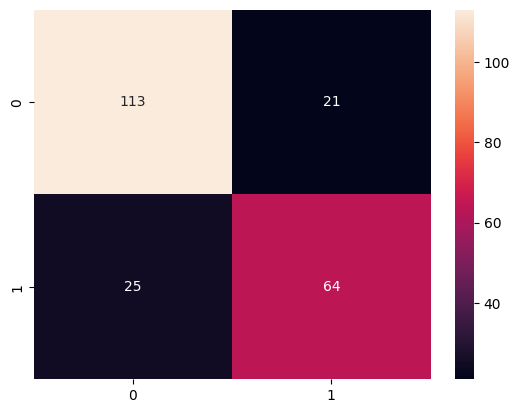

In [149]:
sns.heatmap(cm_GBC,annot=True,fmt='d')

In [150]:
import joblib


In [151]:
joblib.dump(RFC, "random_forest_model.joblib")

['random_forest_model.joblib']